# Document Classification

### Preparing the Data

In [1]:
import re
import string
import numpy as np
from unicodedata import normalize
from nltk import word_tokenize

def load_file(path: str):
    """ Loads the file into memory """
    with open(path, 'r', encoding='utf8') as fo:
        content = fo.read()
    return content

def clean_data(content: str):
    """ Cleans the data for tokenization """
    # Lowercase text and remove leading and ending newlines
    text = content.lower().strip('\n')
    # Fix any encoding issues
    text = normalize('NFD', text).encode('utf8')
    text = text.decode('utf8')
    # Match by paragraphs (at least two new lines)
    par_match = re.compile(r'\n{2,}')
    lines = par_match.split(text)
    cleaned = list()
    for line in lines:
        # Remove new line symbols
        line = line.replace('\n', ' ')
        # Remove special characters and numbers
        line = re.sub("[^a-z\s\']+", " ", line).replace("'", "")
        # Remove line with < 15 words
        line = line.split()
        if len(line) > 15:
            # Remove whitespace
            line = ' '.join(line)
            cleaned.append(line)
    return np.array(cleaned)

In [2]:
fyodor = load_file('q1/28054-0.txt')
f_data = clean_data(fyodor)
f_labels = np.zeros(f_data.shape[0])
f_data[0:2], f_labels[0:2]

(array(['this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at http www gutenberg org license if you are not located in the united states you ll have to check the laws of the country where you are located before using this ebook',
        'part i book i the history of a family chapter i fyodor pavlovitch karamazov chapter ii he gets rid of his eldest son chapter iii the second marriage and the second family chapter iv the third son alyosha chapter v elders book ii an unfortunate gathering chapter i they arrive at the monastery chapter ii the old buffoon chapter iii peasant women who have faith chapter iv a lady of little faith chapter v so be it so be it chapter vi why is such a man alive chapter vii a young man bent on a career chapter viii the scandalous scen

In [3]:
doyle = load_file('q1/pg1661.txt')
d_data = clean_data(doyle)
d_labels = np.ones(d_data.shape[0])
d_data[0:2], d_labels[0:2]

(array(['this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg net',
        'i a scandal in bohemia ii the red headed league iii a case of identity iv the boscombe valley mystery v the five orange pips vi the man with the twisted lip vii the adventure of the blue carbuncle viii the adventure of the speckled band ix the adventure of the engineers thumb x the adventure of the noble bachelor xi the adventure of the beryl coronet xii the adventure of the copper beeches'],
       dtype='<U2489'),
 array([1., 1.]))

In [4]:
austen = load_file('q1/pg31100.txt')
a_data = clean_data(austen)
a_labels = np.ones(a_data.shape[0]) + 1
a_data[0:5], a_labels[0:5]

(array(['this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org',
        'note the accompanying html file has active links to all the volumes and chapters in this set',
        'sir walter elliot of kellynch hall in somersetshire was a man who for his own amusement never took up any book but the baronetage there he found occupation for an idle hour and consolation in a distressed one there his faculties were roused into admiration and respect by contemplating the limited remnant of the earliest patents there any unwelcome sensations arising from domestic affairs changed naturally into pity and contempt as he turned over the almost endless creations of the last century and there if every other leaf were powerless he could read his own history with an interest which never failed this was the page at

In [5]:
data = np.hstack((f_data, d_data))
data = np.hstack((data, a_data))

n = f_data.shape[0] + d_data.shape[0] + a_data.shape[0]
assert data.shape[0] == n

labels = np.hstack((f_labels, d_labels))
labels = np.hstack((labels, a_labels))

assert labels.shape[0] == n
data[0:2], labels[0:2]

(array(['this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at http www gutenberg org license if you are not located in the united states you ll have to check the laws of the country where you are located before using this ebook',
        'part i book i the history of a family chapter i fyodor pavlovitch karamazov chapter ii he gets rid of his eldest son chapter iii the second marriage and the second family chapter iv the third son alyosha chapter v elders book ii an unfortunate gathering chapter i they arrive at the monastery chapter ii the old buffoon chapter iii peasant women who have faith chapter iv a lady of little faith chapter v so be it so be it chapter vi why is such a man alive chapter vii a young man bent on a career chapter viii the scandalous scen

In [6]:
from keras.utils import to_categorical

labels = to_categorical(labels)

assert labels.shape[0] == n
labels.shape

(14068, 3)

In [7]:
n_train = int(data.shape[0] * .8)
n_val = int(data.shape[0] * .2)

indices = np.random.permutation(range(data.shape[0]))
train_indices = indices[:n_train-n_val]
val_indices = indices[n_train-n_val:n_train]
test_indices = indices[n_train:]

X_train, y_train = data[train_indices], labels[train_indices]
X_val, y_val = data[val_indices], labels[val_indices]
X_test, y_test = data[test_indices], labels[test_indices]

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == n
assert y_train.shape[0] + y_val.shape[0] + y_test.shape[0] == n

X_train[20:25]

array(['yes he told me don t tell him it s you that mitya s most afraid of because it s a secret he said himself it was a secret alyosha darling go to him and find out what their secret is and come and tell me grushenka besought him with sudden eagerness set my mind at rest that i may know the worst that s in store for me that s why i sent for you',
       'surely you don t think me such an out and out scoundrel as that you can t be speaking in earnest he said with indignation looking the prosecutor straight in the face and seeming unable to believe his ears',
       'she had never spoken so much at once to him in her life before and never so angrily to any one and when her speech was over she trembled and blushed at her own daring he was surprised but after a few moments silent consideration of her replied in a calmer graver tone and as if the candid result of conviction i believe you are right it was more pleasant than prudent we were getting too noisy and then turning the conversati

In [8]:
X_test.shape, y_test.shape

((2814,), (2814, 3))

In [9]:
max_seq_length = max(len(line.split()) for line in data)
max_seq_length

2681

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
seqs = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

In [11]:
X_train_pad.shape, X_train_pad[0:10]

((8441, 2681),
 array([[   2,   13,   53, ...,    0,    0,    0],
        [  22,   85,   13, ...,    0,    0,    0],
        [   7, 2600,  183, ...,    0,    0,    0],
        ...,
        [  69, 4817, 3570, ...,    0,    0,    0],
        [  40,    9,   36, ...,    0,    0,    0],
        [  14, 3136,   12, ...,    0,    0,    0]], dtype=int32))

In [12]:
seqs = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

seqs = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

X_val_pad.shape, X_test_pad.shape

((2813, 2681), (2814, 2681))

In [13]:
# Run the below lines to download the data from Standford
# You can also follow the guide here: https://keras.io/examples/nlp/pretrained_word_embeddings/

# !wget http://nlp.stanford.edu/data/glove.6B.zip -O /tmp/glove.6B.zip
# !unzip -q /tmp/glove.6B.zip -d /tmp

In [14]:
embeddings_index = {}
with open("/tmp/glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

len(embeddings_index)

400000

In [15]:
num_tokens = len(tokenizer.word_index) + 2
embedding_dim = 100

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    vec = embeddings_index.get(word)
    if vec is not None:
        embedding_matrix[i] = vec


### CNN Model

In [16]:
from keras.layers import Embedding, Conv1D, ZeroPadding1D, Dense, GlobalMaxPooling1D
from keras.metrics import Precision, Recall
from keras.optimizers import Adam
from keras.models import Sequential
from keras.initializers import Constant

import keras.backend as K

histories = list()
for size_filters in (4, 5, 6, 7):
    K.clear_session()
    cnn_model = Sequential()
    cnn_model.add(
        Embedding(
            num_tokens,
            embedding_dim,
            embeddings_initializer=Constant(embedding_matrix),
            trainable=False,
            input_length=max_seq_length
        )
    )
    cnn_model.add(ZeroPadding1D(size_filters-1))
    cnn_model.add(Conv1D(64, size_filters, activation='relu'))
    cnn_model.add(GlobalMaxPooling1D())
    cnn_model.add(Dense(3, activation='softmax'))

    cnn_model.compile(optimizer=Adam(lr=1E-3), loss='categorical_crossentropy', 
                      metrics=['acc', Precision(), Recall()])

    history = cnn_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                            batch_size=32, epochs=5, verbose=0)
    
    print(f"Finished fitting on size {size_filters} filters")
    histories.append(history)


Finished fitting on size 4 filters
Finished fitting on size 5 filters
Finished fitting on size 6 filters
Finished fitting on size 7 filters


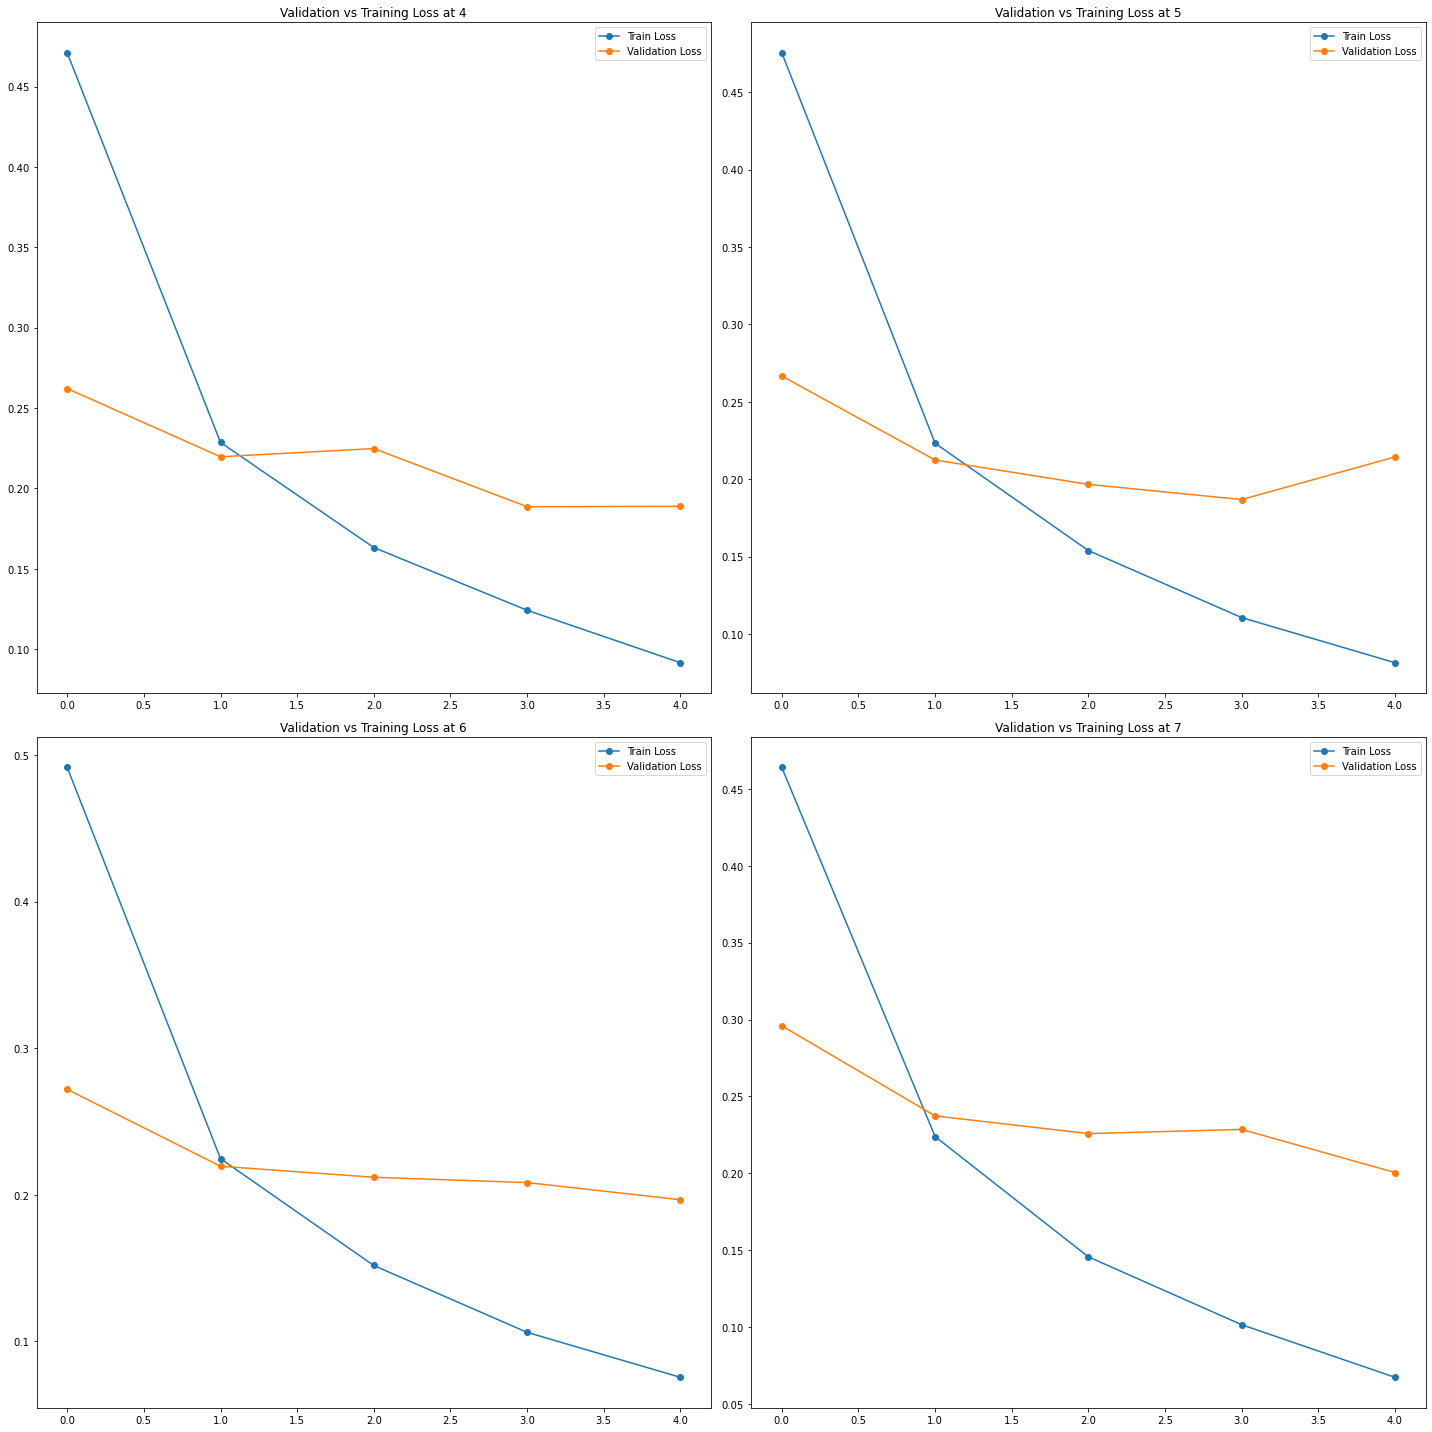

In [17]:
import matplotlib.pyplot as plt

size_filters = (4, 5, 6, 7)
loss = [(h.history['loss'], h.history['val_loss']) for h in histories]
fig, axes = plt.subplots(2, 2, figsize=(20,20))
for idx, loss in enumerate(loss):
    x = idx // 2
    y = idx % 2
    axes[x,y].plot(range(5), loss[0], marker='o')
    axes[x,y].plot(range(5), loss[1], marker='o')
    axes[x,y].set_title(f"Validation vs Training Loss at {size_filters[idx]}")
    axes[x,y].legend(['Train Loss', 'Validation Loss'])
plt.tight_layout()
plt.show()

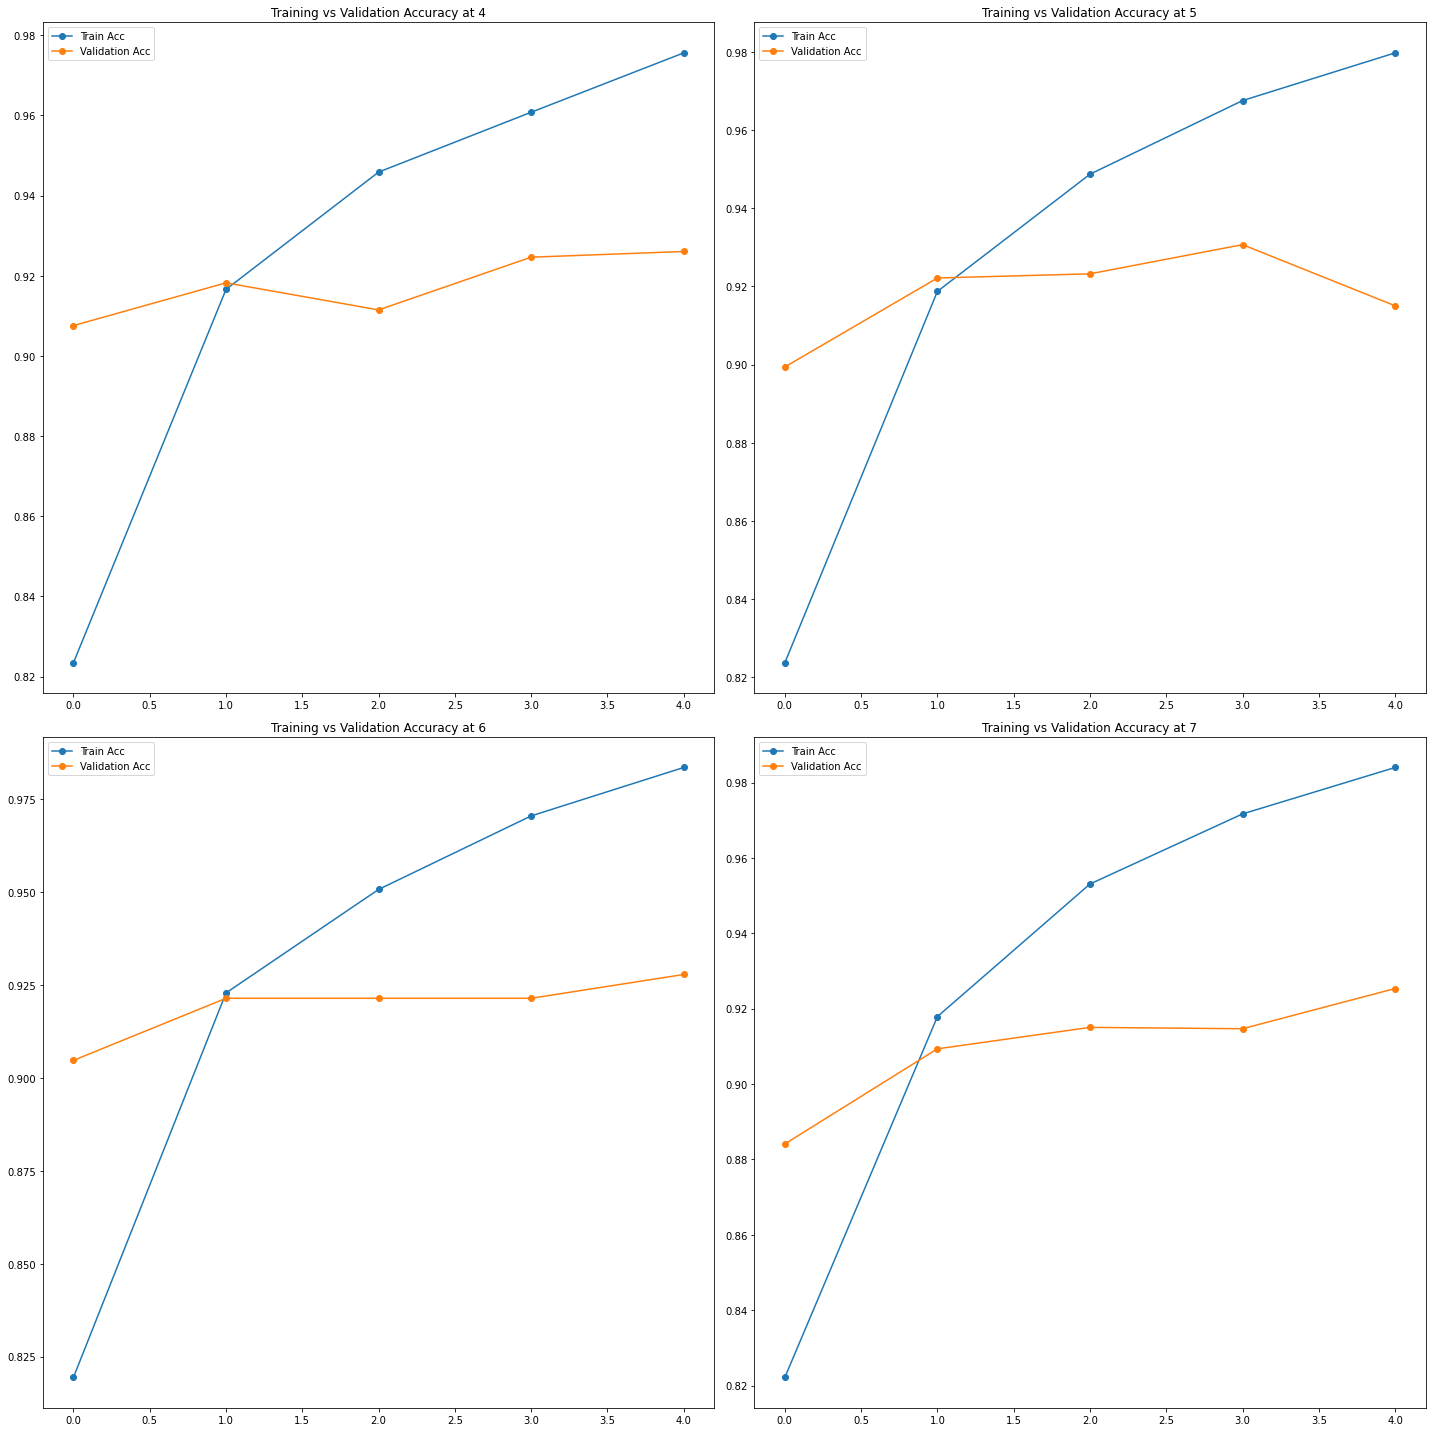

In [18]:
size_filters = (4, 5, 6, 7)
accuracy = [(h.history['acc'], h.history['val_acc']) for h in histories]
fig, axes = plt.subplots(2, 2, figsize=(20,20))
for idx, acc in enumerate(accuracy):
    x = idx // 2
    y = idx % 2
    axes[x,y].plot(range(5), acc[0], marker='o')
    axes[x,y].plot(range(5), acc[1], marker='o')
    axes[x,y].set_title(f"Training vs Validation Accuracy at {size_filters[idx]}")
    axes[x,y].legend(['Train Acc', 'Validation Acc'])
plt.tight_layout()
plt.show()

Best accuracy and least overfit is a filter of size 4. Using the filter of size 4

In [19]:
K.clear_session()
cnn_model = Sequential()
cnn_model.add(
    Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
    )
)
cnn_model.add(ZeroPadding1D(3))
cnn_model.add(Conv1D(64, 4, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(3, activation='softmax'))

cnn_model.compile(optimizer=Adam(lr=1E-3), loss='categorical_crossentropy', 
                  metrics=['acc', Precision(), Recall()])

history = cnn_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                        batch_size=32, epochs=5, verbose=0)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2681, 100)         1794600   
_________________________________________________________________
zero_padding1d (ZeroPadding1 (None, 2687, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 2684, 64)          25664     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 1,820,459
Trainable params: 25,859
Non-trainable params: 1,794,600
_________________________________________________________________


In [20]:
cnn_preds = np.argmax(cnn_model.predict(X_test_pad), axis=1)
cnn_preds.shape, cnn_preds[0:5]

((2814,), array([2, 2, 0, 2, 2]))

### LSTM Models
- First is the global max model
- Second is standard LSTM using the final state

In [21]:
from keras.layers import LSTM

histories = list()
for num_cells in (64, 128, 256, 512):
    K.clear_session()
    lstm_max_model = Sequential()
    lstm_max_model.add(Embedding(
            num_tokens,
            embedding_dim,
            embeddings_initializer=Constant(embedding_matrix),
            trainable=False,
            input_length=max_seq_length
    ))
    lstm_max_model.add(LSTM(num_cells, return_sequences=True))
    lstm_max_model.add(GlobalMaxPooling1D())
    lstm_max_model.add(Dense(3, activation='softmax'))
    
    lstm_max_model.compile(optimizer=Adam(lr=1E-3), loss='categorical_crossentropy', 
                       metrics=['acc', Precision(), Recall()])

    history = lstm_max_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                                 batch_size=32, epochs=5, verbose=0)
    print(f"Finished fitting on {num_cells} cells")
    histories.append(history)

Finished fitting on 64 cells
Finished fitting on 128 cells
Finished fitting on 256 cells
Finished fitting on 512 cells


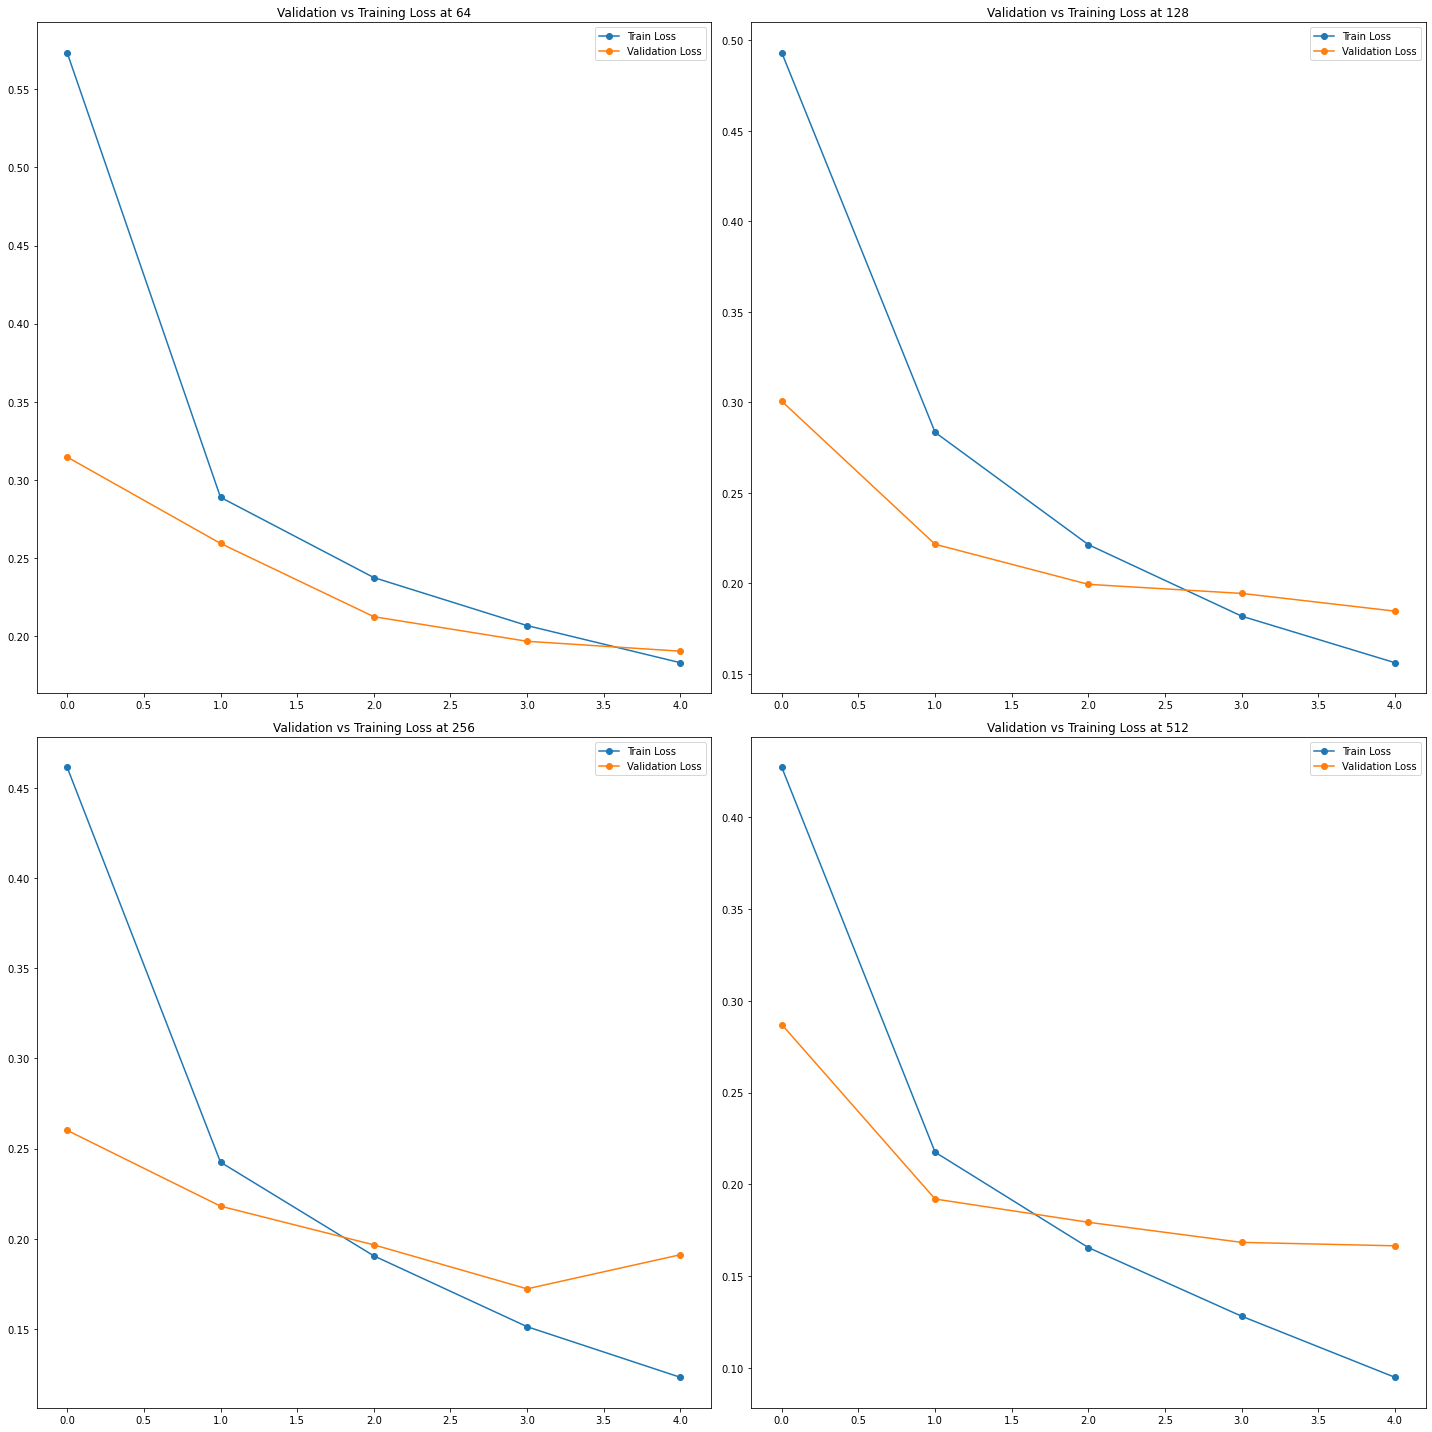

In [22]:
num_cells = (64, 128, 256, 512)
loss = [(h.history['loss'], h.history['val_loss']) for h in histories]
fig, axes = plt.subplots(2, 2, figsize=(20,20))
for idx, loss in enumerate(loss):
    x = idx // 2
    y = idx % 2
    axes[x,y].plot(range(5), loss[0], marker='o')
    axes[x,y].plot(range(5), loss[1], marker='o')
    axes[x,y].set_title(f"Validation vs Training Loss at {num_cells[idx]}")
    axes[x,y].legend(['Train Loss', 'Validation Loss'])
plt.tight_layout()
plt.show()

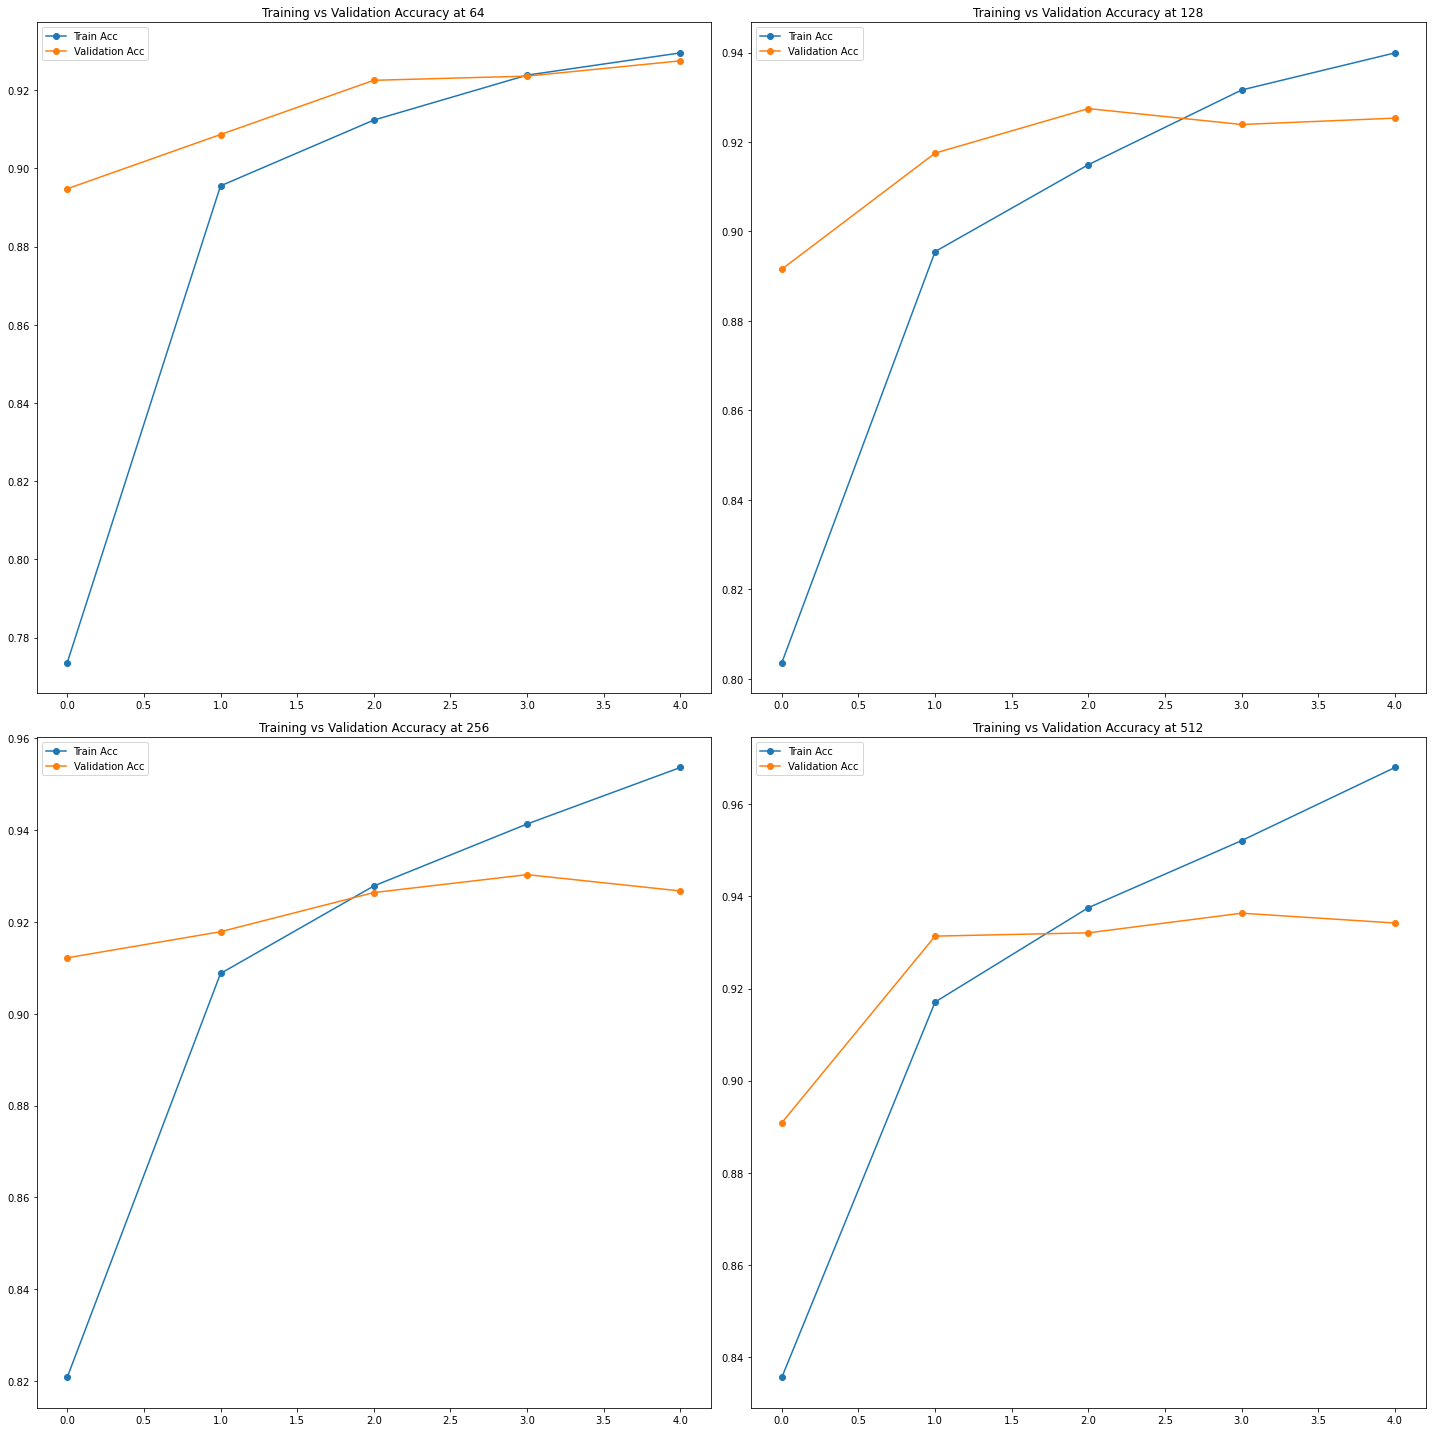

In [23]:
num_cells = (64, 128, 256, 512)
accuracy = [(h.history['acc'], h.history['val_acc']) for h in histories]
fig, axes = plt.subplots(2, 2, figsize=(20,20))
for idx, acc in enumerate(accuracy):
    x = idx // 2
    y = idx % 2
    axes[x,y].plot(range(5), acc[0], marker='o')
    axes[x,y].plot(range(5), acc[1], marker='o')
    axes[x,y].set_title(f"Training vs Validation Accuracy at {num_cells[idx]}")
    axes[x,y].legend(['Train Acc', 'Validation Acc'])
plt.tight_layout()
plt.show()

Definitely 128 performs the best as it is the least overfit and one of the most accurate.

In [24]:
K.clear_session()
lstm_max_model = Sequential()
lstm_max_model.add(Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
))
lstm_max_model.add(LSTM(128, return_sequences=True))
lstm_max_model.add(GlobalMaxPooling1D())
lstm_max_model.add(Dense(3, activation='softmax'))

lstm_max_model.compile(optimizer=Adam(lr=1E-3), loss='categorical_crossentropy', 
                   metrics=['acc', Precision(), Recall()])


history = lstm_max_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                             batch_size=32, epochs=5, verbose=0)
lstm_max_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2681, 100)         1794600   
_________________________________________________________________
lstm (LSTM)                  (None, 2681, 128)         117248    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 1,912,235
Trainable params: 117,635
Non-trainable params: 1,794,600
_________________________________________________________________


In [25]:
lstm_max_preds = np.argmax(lstm_max_model.predict(X_test_pad), axis=1)
lstm_max_preds.shape

(2814,)

**Remark**: Because training is very slow with LSTM, I am only doing the cross-validation with the above model. I understand that it isn't exactly the same, but they are similar and it saves a lot of time.

In [26]:
lstm_model = Sequential()
lstm_model.add(Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2681, 100)         1794600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 1,912,235
Trainable params: 117,635
Non-trainable params: 1,794,600
_________________________________________________________________


In [27]:
lstm_model.compile(optimizer=Adam(lr=1E-3), loss='categorical_crossentropy', 
                  metrics=['acc', Precision(), Recall()])

history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                         batch_size=32, epochs=5)

Epoch 1/5
264/264 [==============================] - 25s 90ms/step - loss: 0.9410 - acc: 0.5970 - precision_1: 0.5846 - recall_1: 0.4507 - val_loss: 0.8908 - val_acc: 0.6164 - val_precision_1: 0.6164 - val_recall_1: 0.6164
Epoch 2/5
264/264 [==============================] - 24s 89ms/step - loss: 0.9027 - acc: 0.6127 - precision_1: 0.6127 - recall_1: 0.6127 - val_loss: 0.8905 - val_acc: 0.6164 - val_precision_1: 0.6164 - val_recall_1: 0.6164
Epoch 3/5
264/264 [==============================] - 23s 89ms/step - loss: 0.9037 - acc: 0.6085 - precision_1: 0.6085 - recall_1: 0.6085 - val_loss: 0.8907 - val_acc: 0.6164 - val_precision_1: 0.6164 - val_recall_1: 0.6164
Epoch 4/5
264/264 [==============================] - 23s 89ms/step - loss: 0.8978 - acc: 0.6119 - precision_1: 0.6119 - recall_1: 0.6119 - val_loss: 0.8925 - val_acc: 0.6164 - val_precision_1: 0.6164 - val_recall_1: 0.6164
Epoch 5/5
264/264 [==============================] - 23s 89ms/step - loss: 0.9077 - acc: 0.6027 - precision_

In [28]:
lstm_preds = np.argmax(lstm_model.predict(X_test_pad), axis=1)
lstm_preds.shape

(2814,)

### Logistic Regression

**Remark**: My models from homework 1 assume that the data has bias inserted into the dataset. The following operations insert bias into my datasets, then computes a TF-IDF vector for the input

In [29]:
import scipy.sparse

from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

def _insert_bias(X):
    """ Inserts the bias """
    bias = np.ones((X.shape[0], 1))
    if isinstance(X, scipy.sparse.csr.csr_matrix):
        X = np.concatenate((X.todense(), bias), axis=1)  # Insert bias into the features
        X = csr_matrix(X)
    else:
        X = np.concatenate((X, bias), axis=1)
    return X

vectorizer = TfidfVectorizer(vocabulary=tokenizer.word_index.keys())
tf_train = vectorizer.fit_transform(X_train)
tf_val = vectorizer.transform(X_val)
tf_test = vectorizer.transform(X_test)

assert tf_train.shape[0] + tf_val.shape[0] + tf_test.shape[0] == n

tf_train.shape, tf_val.shape, tf_test.shape

((8441, 17944), (2813, 17944), (2814, 17944))

In [30]:
tf_train = _insert_bias(tf_train)
tf_val = _insert_bias(tf_val)
tf_test = _insert_bias(tf_test)

tf_train.shape, tf_val.shape, tf_test.shape

((8441, 17945), (2813, 17945), (2814, 17945))

**Note**: Exact model from Homework 1

In [31]:
from typing import Tuple

class LogisticRegression:
    
    def __init__(self, learning_rate: float, max_epochs: int = 1000, precision: float = 1E-6, 
                 lam: float = 1E-4, optimizer: str = 'sgd', batch_size: int = None):
        """ Initializes the class """
        self.rate = learning_rate
        self.epochs = max_epochs
        self.precision = precision
        self.lambda_ = lam
        self.b_ = batch_size
        self.alg_ = self._set_optimizer(optimizer)
        self.loss_ = None
        self.val_loss_ = None
        self.w_ = None
        
    def _set_optimizer(self, optimizer: str):
        """ Sets the optimizer to either stochastic or mini-batch stochastic gradient descent """
        optimizer = optimizer.lower().strip()
        if optimizer == 'sgd':
            return self._stochastic_descent
        elif optimizer == 'mbsgd':
            if not self.b_:
                raise ValueError("You must declare a batch size with 'batch_size' in order to use " \
                                 "mini-batch stochastic gradient descent")
            return self._mb_stochastic_descent
        else:
            raise ValueError(f"Optimizer must be of value 'sgd' or 'mbsgd'. The value {optimizer} is not valid")

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Predicts the class of the input array """
        if len(X.shape) == 1:
            X = X.reshape((1, X.shape[0]))
        phi = X.dot(self.w_)
        return np.argmax(self._softmax_batch(phi), axis=1)
    
    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """ Scores how well the Logistic model predicts """
        labels = self.predict(X)
        onehot = np.argmax(y, axis=1)
        return sum(labels == onehot) / len(y)
    
    def plot(self) -> None:
        """ Plots the loss """
        epochs = len(self.loss_)
        fig = plt.figure(figsize=(10, 5))
        plt.plot(range(epochs), self.loss_)
        if self.val_loss_:
            plt.plot(range(epochs), self.val_loss_)
        plt.title('Loss per Epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
    def fit(self, X: np.ndarray, y: np.ndarray, X_val: np.ndarray = None, y_val: np.ndarray = None,
            verbose: bool = True) -> None:
        """ Fits the model to the training data """
        self.loss_ = list()
        self.val_loss_ = list()
        for i in range(self.epochs):
            n, d = X.shape
            rand_indices = np.random.permutation(n)
            xi = X[rand_indices, :]
            yi = y[rand_indices, :]
            
            if self.w_ is None:
                self.w_ = np.random.normal(scale = 0.1, size = (d, yi.shape[1])) # d x k matrix
            
            loss = self.alg_(xi, yi)
            self.loss_.append(loss)
            
            val_loss = None
            if X_val is not None and y_val is not None:
                val_loss = self.loss(X_val, y_val)
                self.val_loss_.append(val_loss)
            
            if verbose:
                print(f"Loss at epoch {i} is {loss}")
                if val_loss:
                    print(f"Val Loss at epoch {i} is {val_loss}")
            
            if i > 0 and abs(self.loss_[i-1] - loss) <= self.precision:
                print(f"Precision reached at epoch {i}")
                break
                
            self.rate *= 0.9  # Decay the learning rate for stability
            
    def loss(self, X, y) -> float:
        """ Defines the loss for the model """
        phi = X.dot(self.w_)  # 1 x k vector
        softmax = self._softmax_batch(phi)  # 1 x k vector
        loss = np.sum(np.multiply(y, np.log(softmax))) 
        loss += self.lambda_ * np.sum(np.square(self.w_))  # scalar
        return -loss / X.shape[0]
        
    def _stochastic_descent(self, xi: np.ndarray, yi: np.ndarray) -> float:
        """ Implementation of stochastic gradient descent """
        n, d = xi.shape
        epoch_loss = 0.
        for k in range(n):
            x = xi[k, :]
            y = yi[k, :]
            loss, g = self._stochastic_gradient(x, y)
            epoch_loss += loss
            self.w_ -= self.rate * g
        return -epoch_loss / n
        
    def _stochastic_gradient(self, x: np.ndarray, y: np.ndarray) -> Tuple[float, np.ndarray]:
        """ Computes the stochastic gradient and its loss """
        if len(x.shape) == 1:
            x = x.reshape((1, x.shape[0]))  # 1 x d vector
        if len(y.shape) == 1:
            y = y.reshape((1, y.shape[0]))  # 1 x k vector
        
        phi = x.dot(self.w_)  # 1 x k vector
        softmax = self._softmax(phi)  # 1 x k vector
        loss = np.sum(np.multiply(y, np.log(softmax))) + (self.lambda_ * np.sum(np.square(self.w_)))  # scalar     
        g = (x.T.dot(softmax - y)) + (2 * self.lambda_ * self.w_) # d x k matrix
        return loss, g
    
    @staticmethod
    def _softmax(phi: np.ndarray) -> np.ndarray:
        """ Solves the softmax function """
        exps = np.exp(phi)
        return exps / np.sum(exps)  # k x 1 matrix

    def _mb_stochastic_descent(self, xi: np.ndarray, yi: np.ndarray) -> float:
        """ Implementation of stochastic gradient descent """
        n, d = xi.shape
        iters = int(n / self.b_)
        epoch_loss = 0.
        start = 0
        for k in range(iters):
            end = start + self.b_
            x = xi[start:end, :]
            y = yi[start:end, :]
            loss, g = self._mb_stochastic_gradient(x, y)
            epoch_loss += loss
            self.w_ -= self.rate * g
            start = end
        return -epoch_loss / iters
        
    def _mb_stochastic_gradient(self, x: np.ndarray, y: np.ndarray) -> Tuple[float, np.ndarray]:
        """ Computes the mini-batch stochastic gradient and its loss """
        phi = x.dot(self.w_)  # b x k matrix
        softmax = self._softmax_batch(phi)  # b x k matrix
        
        loss = np.sum(np.multiply(y, np.log(softmax))) 
        loss += self.lambda_ * np.sum(np.square(self.w_))  # scalar
        loss /= self.b_
        
        g = x.T.dot(softmax - y) + (2 * self.lambda_ * self.w_) # d x k matrix
        g /= self.b_
        return loss, g

    @staticmethod
    def _softmax_batch(phi: np.ndarray) -> np.ndarray:
        """ Defines row-wise softmax """
        exps = np.exp(phi)
        return exps / np.sum(exps, axis=1, keepdims=True)

In [32]:
sgdlog = LogisticRegression(0.1, max_epochs=10)
sgdlog.fit(tf_train, y_train, tf_val, y_val)

Loss at epoch 0 is 0.5440090159258788
Val Loss at epoch 0 is 0.44882596156009896
Loss at epoch 1 is 0.3296007310449906
Val Loss at epoch 1 is 0.3769799247909273
Loss at epoch 2 is 0.25815296712816155
Val Loss at epoch 2 is 0.34357050000299144
Loss at epoch 3 is 0.22002067673674713
Val Loss at epoch 3 is 0.32476632177446074
Loss at epoch 4 is 0.19610326730645952
Val Loss at epoch 4 is 0.31578301354664445
Loss at epoch 5 is 0.1806458776706048
Val Loss at epoch 5 is 0.3070434722732004
Loss at epoch 6 is 0.1694080843823151
Val Loss at epoch 6 is 0.3030941547329484
Loss at epoch 7 is 0.16157242405442465
Val Loss at epoch 7 is 0.30017288883463383
Loss at epoch 8 is 0.1562346348132434
Val Loss at epoch 8 is 0.29736915678147613
Loss at epoch 9 is 0.15163723087296763
Val Loss at epoch 9 is 0.29462513508670923


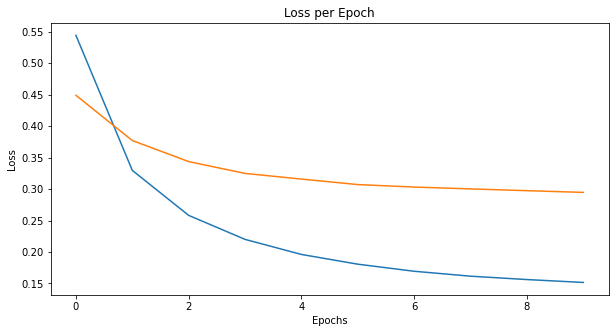

In [33]:
sgdlog.plot()

In [34]:
sgdlog_preds = sgdlog.predict(tf_test)
sgdlog_preds.shape

(2814,)

### Neural Network
- Exact NN from Homework 1

In [35]:
class Neuron:
    
    def __init__(self):
        """ Initializes the Neuron """
        pass
    
    def forward(self, xi):
        """ Defines the foward pass of the neuron """
        pass
    
    def backward(self, xi, gradient, rate):
        """ Defines the backward pass for the neuron """
        pass
    

class ReLU(Neuron):
    
    def __init__(self):
        """ Initializes the Neuron """
        pass
    
    def forward(self, xi):
        """ Defines the ReLU function """
        return np.maximum(0, xi)
    
    def backward(self, xi, gradient, rate):
        """ Defines the gradient for the ReLU function """
        relu_g = xi > 0
        backpass = gradient * relu_g
        return backpass
        

class Tanh(Neuron):
    
    """ This was a thought, but it was not actually used """
    
    def __init__(self):
        """ Initializes the Neuron """
        pass
    
    def forward(self, xi):
        """ Defines the Tanh function """
        return np.tanh(xi)
    
    def backward(self, xi, gradient, rate):
        """ Defines the gradient for the Tanh function """
        backpass = (1 - np.square(np.tanh(xi))) * gradient
        return backpass
    

class Softmax(Neuron):
     
    def __init__(self):
        """ Initializes the Neuron """
        pass

    def forward(self, xi):
        """ Defines the Softmax function """
        exps = np.exp(xi - np.max(xi))  # Adding np.max(xi) for numeric stability
        return exps / np.sum(exps, axis=1, keepdims=True)
    
    def backward(self, xi, gradient, rate):
        """ Defines the gradient for the Softmax function """
        sm = self.forward(xi) 
        backpass = (sm - gradient) / xi.shape[0]  # Assume the gradient is one-hot encoded y
        return backpass
    

class Layer(Neuron):
    
    def __init__(self, xdim: int, ydim: int):
        """ Initializes the class """
        # Bias is assumed to be a feature for simplification purposes
        self._he_init = np.sqrt((2 / (xdim + ydim)))  # Initialize the weights with He initialization scheme
        self.w_ = np.random.normal(scale = self._he_init, size = (xdim, ydim))
        
    def forward(self, xi) -> np.ndarray:
        """ Performs the linear matrix operation for the layer """
        return xi.dot(self.w_)
    
    def backward(self, xi, gradient, rate):
        """ Performs the backward pass for the layer """
        # Mini-batch stochastic descent
        cost = xi.T.dot(gradient) / xi.shape[0]  # Assumes mini-batch stochastic gradient-descent 
        self.w_ -= rate * cost
        
        # Gradient for Input
        xi_gradient = gradient.dot(self.w_.T)
        return xi_gradient
    

class Network:
    
    def __init__(self, learning_rate: float = 0.1, max_epochs: int = 1000, precision: float = 1E-6, 
                 batch_size: int = None):
        """ Initializes the Network """
        self.network = []
        self.rate = learning_rate
        self.epochs = max_epochs
        self.precision = precision
        self.b_ = batch_size
        self.loss_ = None
        self.val_loss_ = None
        self.get_loss = None
        self.get_gradient = None
    
    def add_layer(self, layer) -> None:
        """ Adds a layer to the network """
        self.network.append(layer)
    
    def loss(self, func, func_prime):
        """ Sets the loss to use for the network """
        self.get_loss = func
        self.get_gradient = func_prime
            
    def predict(self, X) -> np.ndarray:
        """ Defines the predict function """
        results = self._feed_forward(X)
        return results[-1]
    
    def score(self, X, y) -> float:
        """ Scores the predictive ability of the Network """
        results = self.predict(X)
        labels = np.argmax(results, axis=1)
        y = np.argmax(y, axis=1)
        return sum(labels == y) / len(labels)
    
    def fit(self, X: np.ndarray, y: np.ndarray, X_val: np.ndarray = None, y_val: np.ndarray = None,
            verbose: bool = True):
        """ Fits the network to the training vectors """
        self.loss_ = list()
        self.val_loss_ = list()
        for i in range(self.epochs):
            n, d = X.shape
            rand_indices = np.random.permutation(n)
            xi = X[rand_indices, :]
            yi = y[rand_indices, :]
            
            loss = self._train(xi, yi)
            self.loss_.append(loss)
            
            val_loss = None
            if X_val is not None and y_val is not None:
                preds = self.predict(X_val)
                val_loss = -self.get_loss(preds, y_val)
                self.val_loss_.append(val_loss)
            
            if verbose:
                print(f"Loss at epoch {i} is {loss}")
                if val_loss:
                    print(f"Val Loss at epoch {i} is {val_loss}")
            
            if i > 0 and abs(self.loss_[i-1] - loss) <= self.precision:
                print(f"Precision reached at epoch {i}")
                break
    
    def plot(self) -> None:
        """ Plots the loss """
        epochs = len(self.loss_)
        fig = plt.figure(figsize=(10, 5))
        plt.plot(range(epochs), self.loss_)
        if self.val_loss_:
            plt.plot(range(epochs), self.val_loss_)
        plt.title('Loss per Epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
    def _train(self, xi: np.ndarray, yi: np.ndarray) -> float:
        """ Implements mini-batch stochastic gradient descent """
        n, _ = xi.shape
        iters = int(n / self.b_)
        epoch_loss = 0.
        start = 0
        for k in range(iters):
            end = start + self.b_
            x = xi[start:end, :]
            y = yi[start:end, :]
            outputs = self._feed_forward(x)
            result = outputs[-1]
            
            loss = self.get_loss(result, y)
            epoch_loss += loss
            
            g = self.get_gradient(result, y)
            self._backward_pass(outputs, g)
            start = end
        return -epoch_loss / iters
        
    def _feed_forward(self, xi) -> np.ndarray:
        """ Feeds the sample forward through the network """
        outputs = [None] * (len(self.network) + 1)
        outputs[0] = xi
        for i, layer in enumerate(self.network):
            xi = layer.forward(xi)
            outputs[i + 1] = xi
        return outputs
    
    def _backward_pass(self, outputs, gradient) -> None:
        """ Implements a backward pass through the network """
        for i in range(len(outputs) - 1)[::-1]:
            xi = outputs[i]
            layer = self.network[i]
            gradient = layer.backward(xi, gradient, self.rate)

In [36]:
def cross_entropy_loss(x, y) -> float:
    """ Returns the loss of cross entropy logistic regression """
    loss = np.sum(np.multiply(y, np.log(x))) / x.shape[0]
    return loss

def cross_entropy_loss_g(x, y) -> np.ndarray:
    """ Returns gradient of loss for network """
    return y  # Only return y because the output layer has the gradient

In [37]:
def build_network(xdim: int, ydim: int, epochs: int = 30, batch_size = 12, neurons: int = 50) -> tuple:
    """ Gets everything ready to start """
    net = Network(0.1, max_epochs = epochs, batch_size = batch_size)
    net.add_layer(Layer(xdim, neurons))
    net.add_layer(ReLU())
    net.add_layer(Layer(neurons, ydim))
    net.add_layer(Softmax())
    net.loss(cross_entropy_loss, cross_entropy_loss_g)
    return net

In [38]:
net = build_network(tf_train.shape[1], y_train.shape[1], epochs = 10, neurons = 75)
net.fit(tf_train, y_train, tf_val, y_val)

Loss at epoch 0 is 0.9353569860039894
Val Loss at epoch 0 is 0.872772813698475
Loss at epoch 1 is 0.8696855322759426
Val Loss at epoch 1 is 0.8480460873099387
Loss at epoch 2 is 0.8434633217260931
Val Loss at epoch 2 is 0.819899578345837
Loss at epoch 3 is 0.8100069486643001
Val Loss at epoch 3 is 0.7842884501338051
Loss at epoch 4 is 0.7699255134870915
Val Loss at epoch 4 is 0.7411077881237368
Loss at epoch 5 is 0.7251006375457555
Val Loss at epoch 5 is 0.6962185830882588
Loss at epoch 6 is 0.6790583642795128
Val Loss at epoch 6 is 0.6522609629531763
Loss at epoch 7 is 0.6343147428760336
Val Loss at epoch 7 is 0.6094111216086756
Loss at epoch 8 is 0.592590151756234
Val Loss at epoch 8 is 0.5711962166700568
Loss at epoch 9 is 0.5550548974849966
Val Loss at epoch 9 is 0.5375101791427555


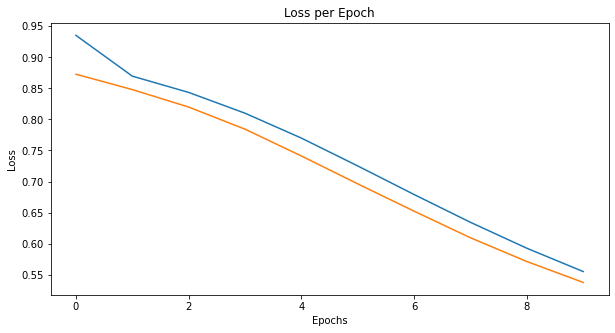

In [39]:
net.plot()

In [40]:
net_preds = np.argmax(net.predict(tf_test), axis=1)
net_preds.shape

(2814,)

### Metrics

In [41]:
from sklearn.metrics import precision_recall_fscore_support

y_true = np.argmax(y_test, axis=1)

cnn_precision, cnn_recall, cnn_f1, _ = precision_recall_fscore_support(y_true, cnn_preds, labels=[0, 1, 2])
lstm_max_precision, lstm_max_recall, lstm_max_f1, _ = precision_recall_fscore_support(
    y_true, lstm_max_preds, labels=[0, 1, 2]
)

lstm_precision, lstm_recall, lstm_f1, _ = precision_recall_fscore_support(y_true, lstm_preds, labels=[0, 1, 2])
lr_precision, lr_recall, lr_f1, _ = precision_recall_fscore_support(y_true, sgdlog_preds, labels=[0, 1, 2])
net_precision, net_recall, net_f1, _ = precision_recall_fscore_support(y_true, net_preds, labels=[0, 1, 2])

/home/jmack/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
def report_results(options, name, results):
    columns = [name, "Group 0", "Group 1", "Group 2", "Average"]
    max_len = len(max(columns, key=lambda x: len(x)))
    header = " | ".join('{0:{width}}'.format(col, width=max_len) for col in columns)
    print(header)
    print("-" * len(header))
    for i, r in enumerate(results):
        r = np.round_(np.multiply(100, r), decimals=2)
        line = [options[i], r[0], r[1], r[2], np.average(r)]
        print(" | ".join('{0:{width}}'.format(str(r), width=max_len) for r in line))

In [43]:
precision = (cnn_precision, lstm_max_precision, lstm_precision, lr_precision, net_precision)
report_results(("CNN", "LSTM Max", "LSTM Last", "LR", "NN"), "Precision per Group", precision)

Precision per Group | Group 0             | Group 1             | Group 2             | Average            
-----------------------------------------------------------------------------------------------------------
CNN                 | 95.73               | 65.8                | 96.7                | 86.07666666666667  
LSTM Max            | 96.95               | 71.38               | 95.07               | 87.8               
LSTM Last           | 0.0                 | 0.0                 | 62.01               | 20.669999999999998 
LR                  | 94.51               | 93.87               | 91.52               | 93.3               
NN                  | 82.95               | 0.0                 | 84.12               | 55.69              


In [44]:
recall = (cnn_recall, lstm_max_recall, lstm_recall, lr_recall, net_recall)
report_results(("CNN", "LSTM Max", "LSTM Last", "LR", "NN"), "Recall per Group", recall)

Recall per Group | Group 0          | Group 1          | Group 2          | Average         
--------------------------------------------------------------------------------------------
CNN              | 93.43            | 81.95            | 93.98            | 89.78666666666668
LSTM Max         | 92.3             | 76.53            | 96.05            | 88.29333333333334
LSTM Last        | 0.0              | 0.0              | 100.0            | 33.333333333333336
LR               | 91.29            | 55.23            | 98.91            | 81.81           
NN               | 81.06            | 0.0              | 98.34            | 59.800000000000004


In [45]:
f1 = (cnn_f1, lstm_max_f1, lstm_f1, lr_f1, net_f1)
report_results(("CNN", "LSTM Max", "LSTM Last", "LR", "NN"), "F1 Score per Group", f1)

F1 Score per Group | Group 0            | Group 1            | Group 2            | Average           
------------------------------------------------------------------------------------------------------
CNN                | 94.57              | 72.99              | 95.32              | 87.62666666666667 
LSTM Max           | 94.57              | 73.87              | 95.55              | 87.99666666666667 
LSTM Last          | 0.0                | 0.0                | 76.55              | 25.516666666666666
LR                 | 92.87              | 69.55              | 95.07              | 85.83             
NN                 | 81.99              | 0.0                | 90.67              | 57.553333333333335


# Sentiment Analysis

### Preparing the Data

In [46]:
def load_file(path: str):
    """ Loads the file into memory """
    with open(path, 'r', encoding='ISO-8859-1') as fo:
        content = fo.read()
    return content

def clean_data(lines: list):
    """ Cleans the data for tokenization """
    cleaned = list()
    for line in lines:
        # Lowercase text and remove leading and ending newlines
        line = line.lower().strip('\n')
        # Fix any encoding issues
        line = normalize('NFD', line).encode('utf8')
        line = line.decode('utf8')
        # Remove new line symbols
        line = line.replace('\n', ' ')
        # Remove special characters and numbers
        line = re.sub("[^a-z\s\']+", " ", line).replace("'", "")
        # Remove whitespace
        line = ' '.join(line.split())
        cleaned.append(line)
    return np.array(cleaned)

In [47]:
review_match = re.compile(r"((?:\<review_text\>)([\s\w\S]+?)(?:\<\/review_text\>))")

pos = load_file('q2/positive.review')
neg = load_file('q2/negative.review')
pos_reviews = [r.group(2) for r in review_match.finditer(pos)]
neg_reviews = [r.group(2) for r in review_match.finditer(neg)]

In [48]:
len(pos_reviews), len(neg_reviews), pos_reviews[0:5]

(1000,
 1000,
 ["\nBridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them.  \n\nThis is the book that started it all with the chick lit fever.  Bridget Jones is my hero! \n",
  "\nI am ordering copies for all 23 middle school principals and the two assistant principals leading two middle school programs in the Milwaukee Public Schools system. We will use Wheatley's book as the primary resource  for our professional growth at our MPS Middle School Principals  Collaborative institute August 9-11, 1999. We are not just concerned with  reform; we seek renewal as well. Wheatley provides the basis. She notes  that Einstein said that  a problem cannot be solved from the same  consciousness that created it. The entire book is a marvelous exploration  of this philosophy\n",
  '\nAs a casual piano player and a Broadway fanatic, I was so jazzed to play some of the songs from Avenue Q. The book contains everything you find on 

In [49]:
pos_cleaned = clean_data(pos_reviews)
neg_cleaned = clean_data(neg_reviews)

pos_labels = np.ones(len(pos_cleaned))
neg_labels = np.zeros(len(neg_cleaned))

pos_cleaned.shape, neg_cleaned.shape

((1000,), (1000,))

In [50]:
n_train = int(pos_cleaned.shape[0] * .8)
n_val = int(pos_cleaned.shape[0] * .2)

indices = np.random.permutation(range(pos_cleaned.shape[0]))
train_indices = indices[:n_train-n_val]
val_indices = indices[n_train-n_val:n_train]
test_indices = indices[n_train:]

assert train_indices.shape[0] + val_indices.shape[0] + test_indices.shape[0] == 1000

pos_train, y_pos_train = pos_cleaned[train_indices], pos_labels[train_indices]
neg_train, y_neg_train = neg_cleaned[train_indices], neg_labels[train_indices]

pos_val, y_pos_val = pos_cleaned[val_indices], pos_labels[val_indices]
neg_val, y_neg_val = neg_cleaned[val_indices], neg_labels[val_indices]


pos_test, y_pos_test = pos_cleaned[test_indices], pos_labels[test_indices]
neg_test, y_neg_test = neg_cleaned[test_indices], neg_labels[test_indices]

X_train[20:25]

array(['yes he told me don t tell him it s you that mitya s most afraid of because it s a secret he said himself it was a secret alyosha darling go to him and find out what their secret is and come and tell me grushenka besought him with sudden eagerness set my mind at rest that i may know the worst that s in store for me that s why i sent for you',
       'surely you don t think me such an out and out scoundrel as that you can t be speaking in earnest he said with indignation looking the prosecutor straight in the face and seeming unable to believe his ears',
       'she had never spoken so much at once to him in her life before and never so angrily to any one and when her speech was over she trembled and blushed at her own daring he was surprised but after a few moments silent consideration of her replied in a calmer graver tone and as if the candid result of conviction i believe you are right it was more pleasant than prudent we were getting too noisy and then turning the conversati

In [51]:
X_train, y_train = np.hstack((pos_train, neg_train)), np.hstack((y_pos_train, y_neg_train))
X_val, y_val = np.hstack((pos_val, neg_val)), np.hstack((y_pos_val, y_neg_val))
X_test, y_test = np.hstack((pos_test, neg_test)), np.hstack((y_pos_test, y_neg_test))

n = len(pos_cleaned) + len(neg_cleaned)
print(X_train.shape[0] + X_val.shape[0] + X_test.shape[0])
assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == n
assert y_train.shape[0] + y_val.shape[0] + y_test.shape[0] == n
X_train[0:5], y_train[0:5]

2000


(array(['stephen king has written another attention grabber i read and listened as i have both the paperback and the audio book i found this book great as it follows both the imaginary and the real sides of life i found that as i read the book i really would like to visit the library that is described in the book this book follows down a strange path emerging in what could almost be explained as a real story of fact in the past i recommend this novel and the audio book as the narrator does a great job it will not dissapoint as quot everythings eventual quot did in my opinion good luck and good reading note the audio version of this book is narrated by frank muller anyone who has listened to stephen king audio books has sure to have been wowwed by frank muller in this audio book recording frank mullers voice is almost unrecognizable and amazing as he plays this roll frank muller and audio books are truly like movies for your mind',
        'great book my partners therapist recommended i

In [52]:
max_seq_length = max(len(line.split()) for line in X_train)
max_seq_length

5355

In [53]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
seqs = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

In [54]:
seqs = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

seqs = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

X_val_pad.shape, X_test_pad.shape

((400, 5355), (400, 5355))

In [55]:
embeddings_index = {}
with open("/tmp/glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

len(embeddings_index)

400000

In [56]:
num_tokens = len(tokenizer.word_index) + 2
embedding_dim = 100

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    vec = embeddings_index.get(word)
    if vec is not None:
        embedding_matrix[i] = vec

### CNN Model

In [57]:
histories = list()
for size_filters in (4, 5, 6, 7):
    K.clear_session()
    
    cnn_model = Sequential()
    cnn_model.add(
        Embedding(
            num_tokens,
            embedding_dim,
            embeddings_initializer=Constant(embedding_matrix),
            trainable=False,
            input_length=max_seq_length
        )
    )
    cnn_model.add(ZeroPadding1D(size_filters-1))
    cnn_model.add(Conv1D(64, size_filters, activation='relu'))
    cnn_model.add(GlobalMaxPooling1D())
    cnn_model.add(Dense(1, activation='sigmoid'))
    
    cnn_model.compile(optimizer=Adam(lr=1E-3), loss='binary_crossentropy', 
                      metrics=['acc'])

    history = cnn_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                            batch_size=32, epochs=5, verbose=0)
    
    print(f"Finished fitting on size {size_filters} filters")
    histories.append(history)

Finished fitting on size 4 filters
Finished fitting on size 5 filters
Finished fitting on size 6 filters
Finished fitting on size 7 filters


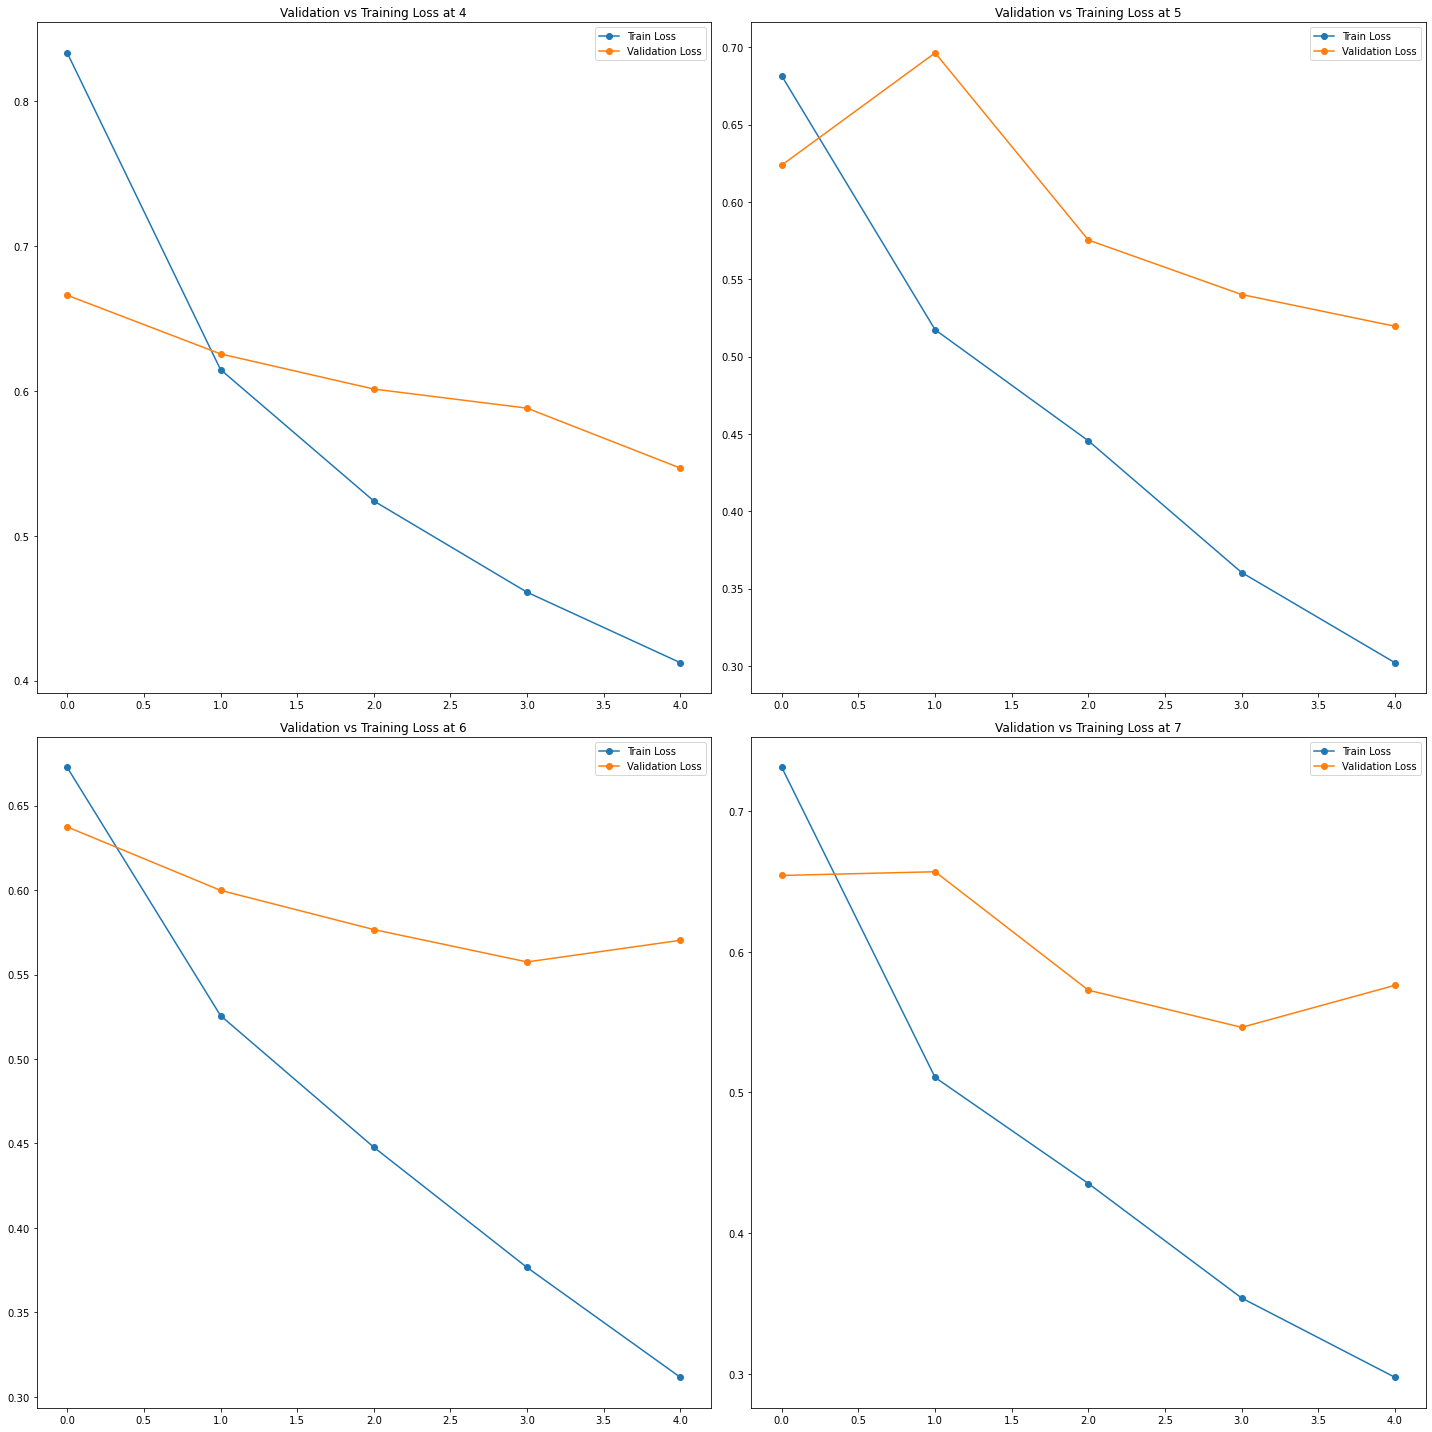

In [58]:
size_filters = (4, 5, 6, 7)
loss = [(h.history['loss'], h.history['val_loss']) for h in histories]
fig, axes = plt.subplots(2, 2, figsize=(20,20))
for idx, loss in enumerate(loss):
    x = idx // 2
    y = idx % 2
    axes[x,y].plot(range(5), loss[0], marker='o')
    axes[x,y].plot(range(5), loss[1], marker='o')
    axes[x,y].set_title(f"Validation vs Training Loss at {size_filters[idx]}")
    axes[x,y].legend(['Train Loss', 'Validation Loss'])
plt.tight_layout()
plt.show()

All of them are overfitting, but 4 and 6 are the least overfit so far.

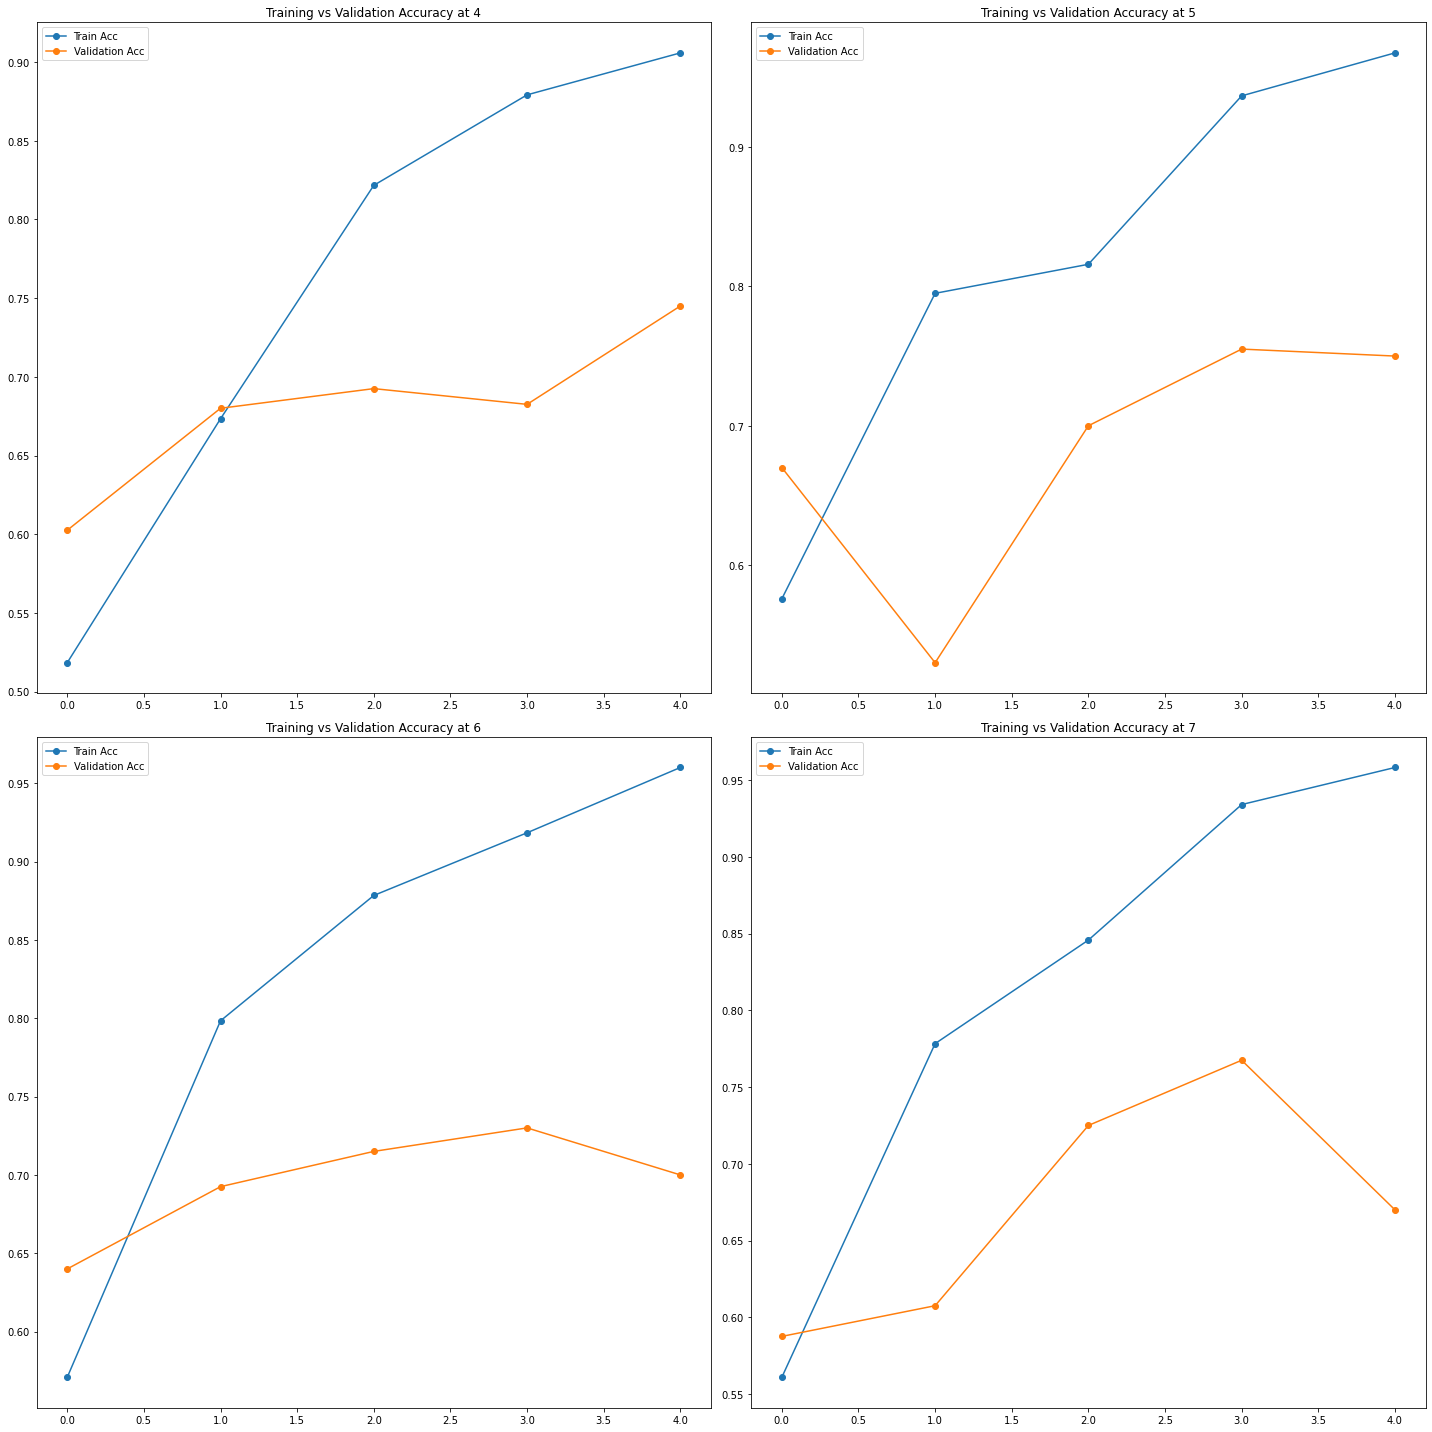

In [59]:
size_filters = (4, 5, 6, 7)
accuracy = [(h.history['acc'], h.history['val_acc']) for h in histories]
fig, axes = plt.subplots(2, 2, figsize=(20,20))
for idx, acc in enumerate(accuracy):
    x = idx // 2
    y = idx % 2
    axes[x,y].plot(range(5), acc[0], marker='o')
    axes[x,y].plot(range(5), acc[1], marker='o')
    axes[x,y].set_title(f"Training vs Validation Accuracy at {size_filters[idx]}")
    axes[x,y].legend(['Train Acc', 'Validation Acc'])
plt.tight_layout()
plt.show()

The best size here if 4 because it has the highest validation accuracy and it is the least overfit.

In [60]:
cnn_model = Sequential()
cnn_model.add(
    Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
    )
)
cnn_model.add(ZeroPadding1D(3))
cnn_model.add(Conv1D(64, 4, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer=Adam(lr=1E-3), loss='binary_crossentropy', 
                  metrics=['acc'])

history = cnn_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                        batch_size=32, epochs=5, verbose=0)

In [61]:
_, cnn_acc = cnn_model.evaluate(X_test_pad, y_test)

13/13 [==============================] - 0s 13ms/step - loss: 0.5277 - acc: 0.7600


### LSTM Models

In [62]:
lstm_max_model = Sequential()
lstm_max_model.add(Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
))
lstm_max_model.add(LSTM(256, return_sequences=True))
lstm_max_model.add(GlobalMaxPooling1D())
lstm_max_model.add(Dense(1, activation='sigmoid'))
lstm_max_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 5355, 100)         1717500   
_________________________________________________________________
lstm (LSTM)                  (None, 5355, 256)         365568    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,083,325
Trainable params: 365,825
Non-trainable params: 1,717,500
_________________________________________________________________


In [63]:
histories = list()
for num_cells in (64, 128, 256, 512):
    K.clear_session()
    lstm_max_model = Sequential()
    lstm_max_model.add(Embedding(
            num_tokens,
            embedding_dim,
            embeddings_initializer=Constant(embedding_matrix),
            trainable=False,
            input_length=max_seq_length
    ))
    lstm_max_model.add(LSTM(num_cells, return_sequences=True))
    lstm_max_model.add(GlobalMaxPooling1D())
    lstm_max_model.add(Dense(1, activation='sigmoid'))
    
    lstm_max_model.compile(optimizer=Adam(lr=1E-3), loss='binary_crossentropy', 
                      metrics=['acc'])

    history = lstm_max_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                             batch_size=32, epochs=5, verbose=0)
    
    print(f"Finished fitting on {num_cells} cells")
    histories.append(history)

Finished fitting on 64 cells
Finished fitting on 128 cells
Finished fitting on 256 cells
Finished fitting on 512 cells


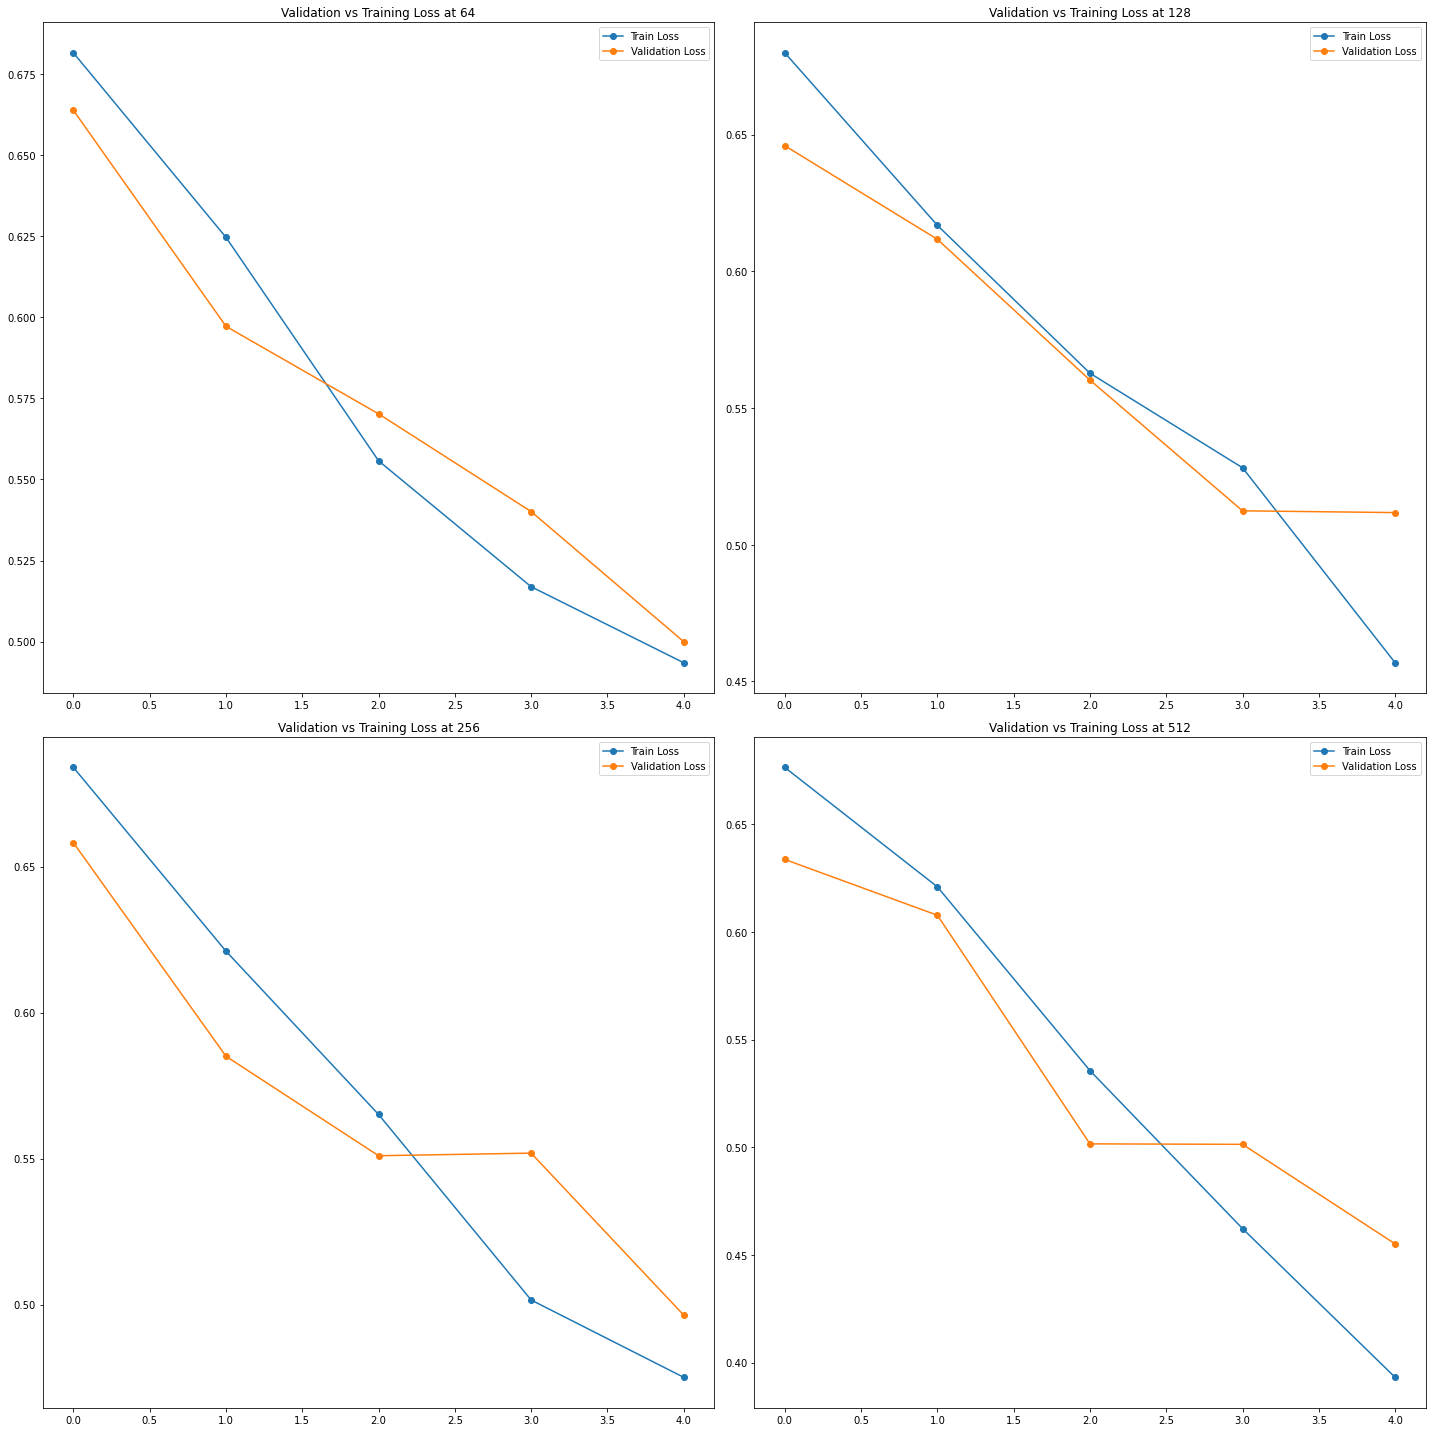

In [64]:
num_cells = (64, 128, 256, 512)
loss = [(h.history['loss'], h.history['val_loss']) for h in histories]
fig, axes = plt.subplots(2, 2, figsize=(20,20))
for idx, loss in enumerate(loss):
    x = idx // 2
    y = idx % 2
    axes[x,y].plot(range(5), loss[0], marker='o')
    axes[x,y].plot(range(5), loss[1], marker='o')
    axes[x,y].set_title(f"Validation vs Training Loss at {num_cells[idx]}")
    axes[x,y].legend(['Train Loss', 'Validation Loss'])
plt.tight_layout()
plt.show()

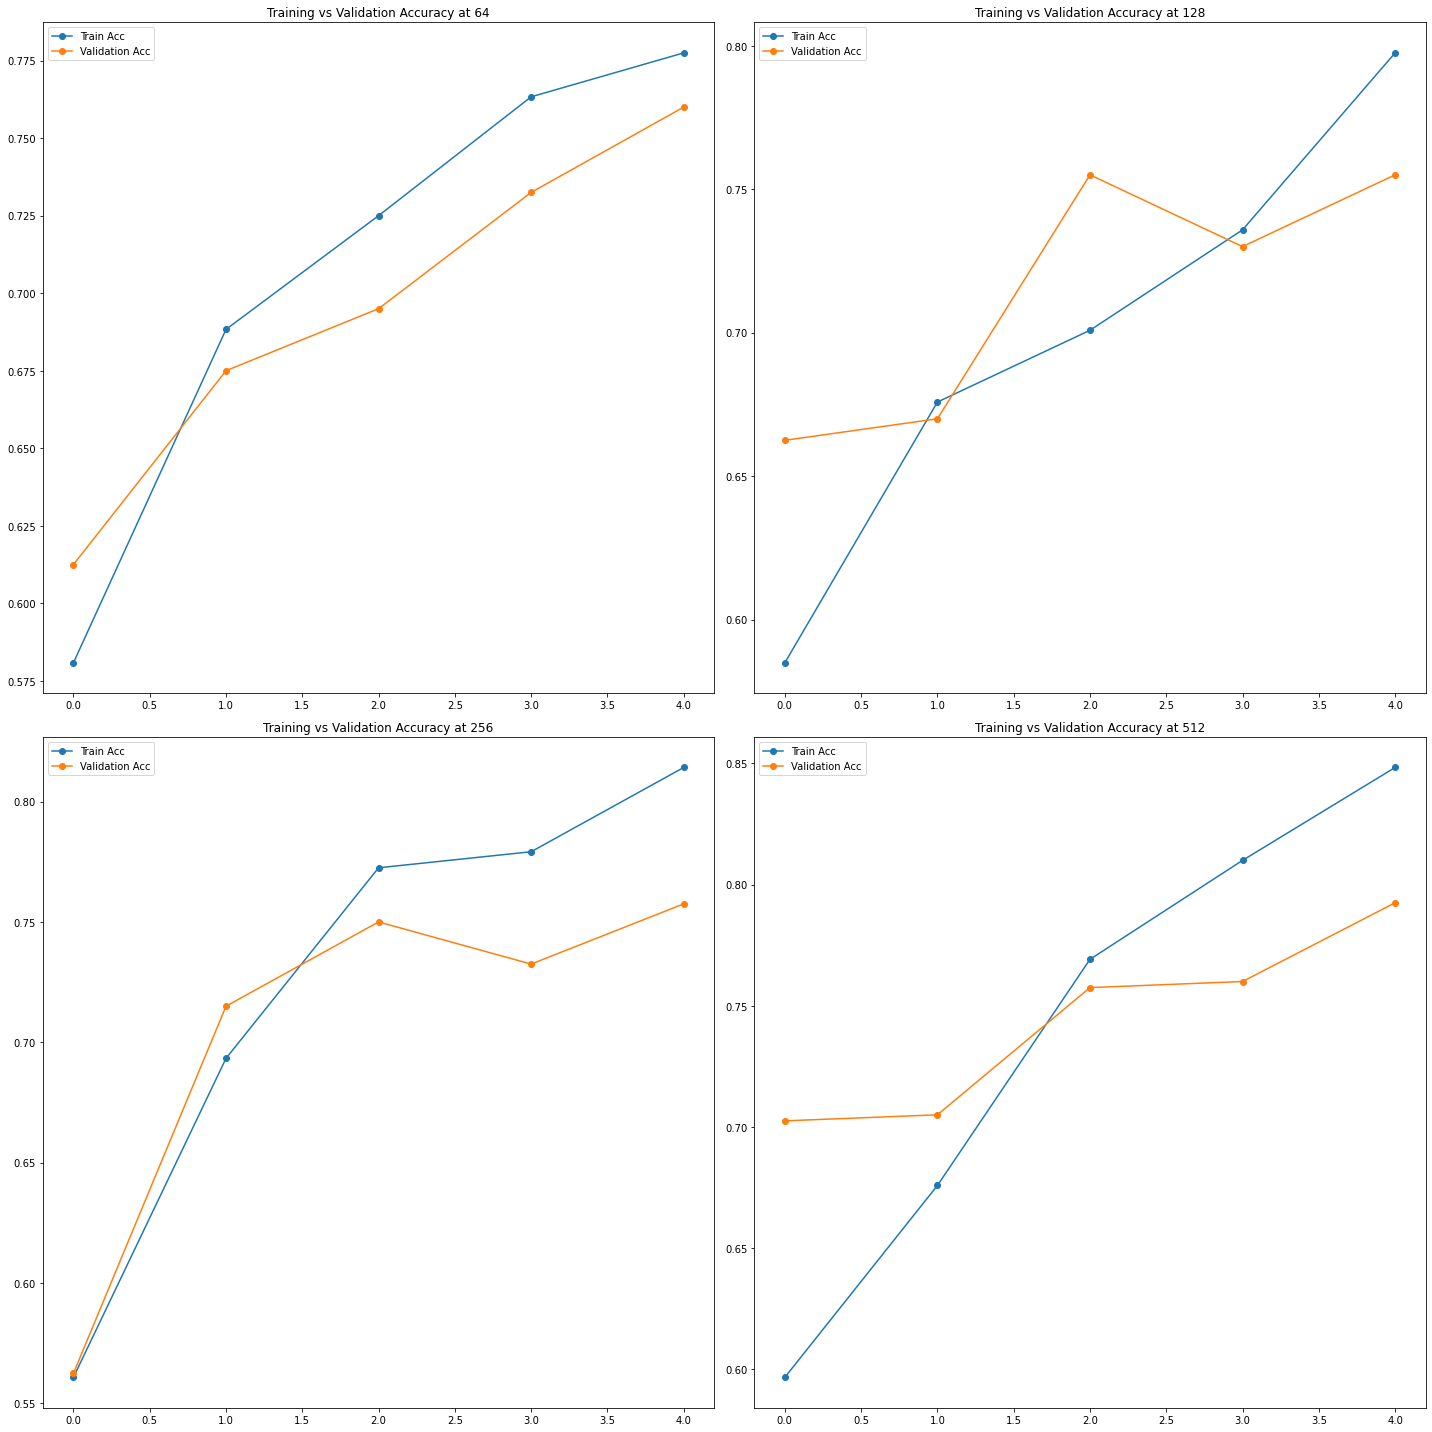

In [65]:
num_cells = (64, 128, 256, 512)
accuracy = [(h.history['acc'], h.history['val_acc']) for h in histories]
fig, axes = plt.subplots(2, 2, figsize=(20,20))
for idx, acc in enumerate(accuracy):
    x = idx // 2
    y = idx % 2
    axes[x,y].plot(range(5), acc[0], marker='o')
    axes[x,y].plot(range(5), acc[1], marker='o')
    axes[x,y].set_title(f"Training vs Validation Accuracy at {num_cells[idx]}")
    axes[x,y].legend(['Train Acc', 'Validation Acc'])
plt.tight_layout()
plt.show()

I believe that 512 has the a very small amount of overfitting, but it has the highest validation accuracy.

In [66]:
K.clear_session()
lstm_max_model = Sequential()
lstm_max_model.add(Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
))
lstm_max_model.add(LSTM(512, return_sequences=True))
lstm_max_model.add(GlobalMaxPooling1D())
lstm_max_model.add(Dense(1, activation='sigmoid'))

lstm_max_model.compile(optimizer=Adam(lr=1E-3), loss='binary_crossentropy', 
                  metrics=['acc'])

history = lstm_max_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                         batch_size=32, epochs=5, verbose=0)

In [67]:
_, lstm_max_acc = lstm_max_model.evaluate(X_test_pad, y_test)

13/13 [==============================] - 2s 119ms/step - loss: 0.5213 - acc: 0.7250


**Remark**: Again, only doing cross-validation on one of the LSTM models to save time and compute.

In [68]:
lstm_model = Sequential()
lstm_model.add(Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
))
lstm_model.add(LSTM(512, return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5355, 100)         1717500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               1255424   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 2,973,437
Trainable params: 1,255,937
Non-trainable params: 1,717,500
_________________________________________________________________


In [69]:
lstm_model.compile(optimizer=Adam(lr=1E-3), loss='binary_crossentropy', 
                  metrics=['acc'])

history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                         batch_size=32, epochs=5)

Epoch 1/5
38/38 [==============================] - 11s 274ms/step - loss: 0.6935 - acc: 0.5178 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/5
38/38 [==============================] - 10s 268ms/step - loss: 0.6930 - acc: 0.5038 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/5
38/38 [==============================] - 10s 267ms/step - loss: 0.6924 - acc: 0.4837 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/5
38/38 [==============================] - 10s 268ms/step - loss: 0.6927 - acc: 0.4947 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/5
38/38 [==============================] - 10s 268ms/step - loss: 0.6909 - acc: 0.4996 - val_loss: 0.6931 - val_acc: 0.5000


In [70]:
_, lstm_acc = lstm_model.evaluate(X_test_pad, y_test)

13/13 [==============================] - 2s 118ms/step - loss: 0.6931 - acc: 0.5000


### Metrics

In [71]:
def report_results(options, name, results):
    columns = [name, "Accuracy"]
    max_len = len(max(columns, key=lambda x: len(x)))
    header = " | ".join('{0:{width}}'.format(col, width=max_len) for col in columns)
    print(header)
    print("-" * len(header))
    for i, r in enumerate(results):
        r = np.round_(np.multiply(100, r), decimals=2)
        line = [options[i], r]
        print(" | ".join('{0:{width}}'.format(str(r), width=max_len) for r in line))

In [72]:
acc = (cnn_acc, lstm_max_acc, lstm_acc)
report_results(("CNN", "LSTM Max", "LSTM Last"), "Accuracy per Model", acc)

Accuracy per Model | Accuracy          
---------------------------------------
CNN                | 76.0              
LSTM Max           | 72.5              
LSTM Last          | 50.0              
